In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/h1n1_vaccine_prediction.csv")

In [ ]:
df.sample(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
3490,3490,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,NaN,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
7492,7492,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Not Principle City",1.0,0.0,0
9486,9486,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"> $75,000",Not Married,Own,Employed,"MSA, Principle City",0.0,0.0,0
11184,11184,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
25328,25328,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,NaN,Not Married,NaN,Unemployed,Non-MSA,3.0,0.0,0


In [ ]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [ ]:
df.head(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0


In [ ]:
df.tail(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [ ]:
df.shape

(26707, 34)

array([[<Axes: title={'center': 'unique_id'}>,
        <Axes: title={'center': 'h1n1_worry'}>,
        <Axes: title={'center': 'h1n1_awareness'}>,
        <Axes: title={'center': 'antiviral_medication'}>,
        <Axes: title={'center': 'contact_avoidance'}>],
       [<Axes: title={'center': 'bought_face_mask'}>,
        <Axes: title={'center': 'wash_hands_frequently'}>,
        <Axes: title={'center': 'avoid_large_gatherings'}>,
        <Axes: title={'center': 'reduced_outside_home_cont'}>,
        <Axes: title={'center': 'avoid_touch_face'}>],
       [<Axes: title={'center': 'dr_recc_h1n1_vacc'}>,
        <Axes: title={'center': 'dr_recc_seasonal_vacc'}>,
        <Axes: title={'center': 'chronic_medic_condition'}>,
        <Axes: title={'center': 'cont_child_undr_6_mnths'}>,
        <Axes: title={'center': 'is_health_worker'}>],
       [<Axes: title={'center': 'has_health_insur'}>,
        <Axes: title={'center': 'is_h1n1_vacc_effective'}>,
        <Axes: title={'center': 'is_h1n1_ri

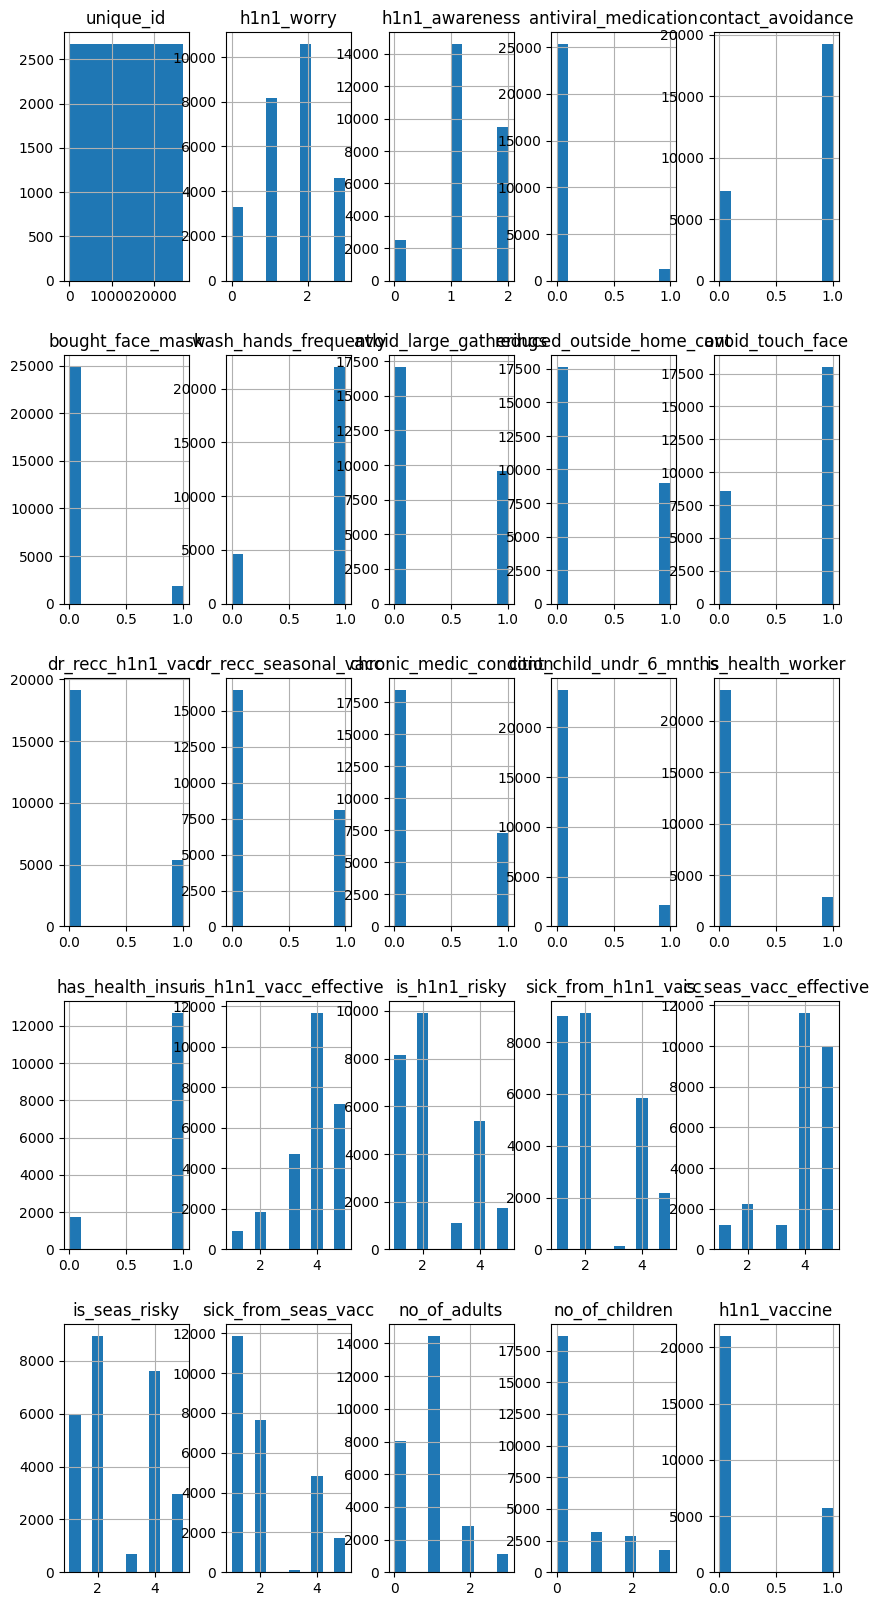

In [ ]:
df.hist(figsize=(10,20))

In [ ]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
unique_id,26707.0,NaN,NaN,NaN,13353.0,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_worry,26615.0,NaN,NaN,NaN,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_awareness,26591.0,NaN,NaN,NaN,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
antiviral_medication,26636.0,NaN,NaN,NaN,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
contact_avoidance,26499.0,NaN,NaN,NaN,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
bought_face_mask,26688.0,NaN,NaN,NaN,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
wash_hands_frequently,26665.0,NaN,NaN,NaN,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
avoid_large_gatherings,26620.0,NaN,NaN,NaN,0.35864,0.47961,0.0,0.0,0.0,1.0,1.0
reduced_outside_home_cont,26625.0,NaN,NaN,NaN,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
avoid_touch_face,26579.0,NaN,NaN,NaN,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0


In [ ]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<Axes: xlabel='sex', ylabel='count'>

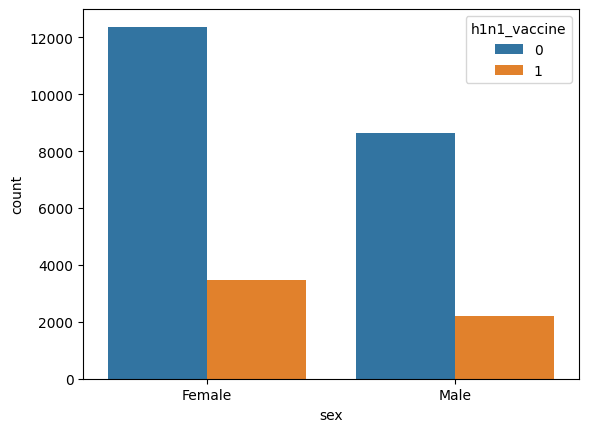

In [ ]:
sns.countplot(x="sex",hue="h1n1_vaccine",data=df)

<Axes: xlabel='marital_status', ylabel='count'>

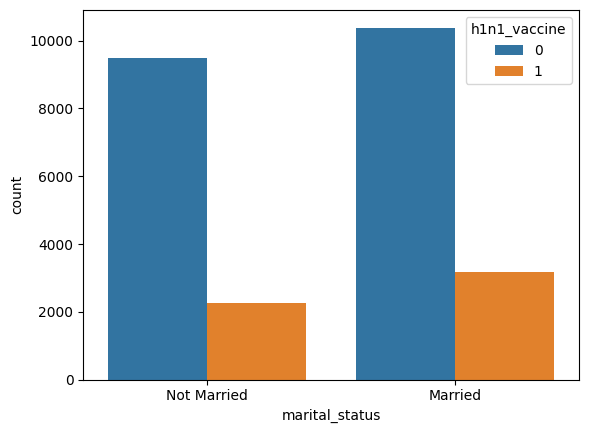

In [ ]:
sns.countplot(x="marital_status",hue="h1n1_vaccine",data=df)

In [ ]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<Axes: >

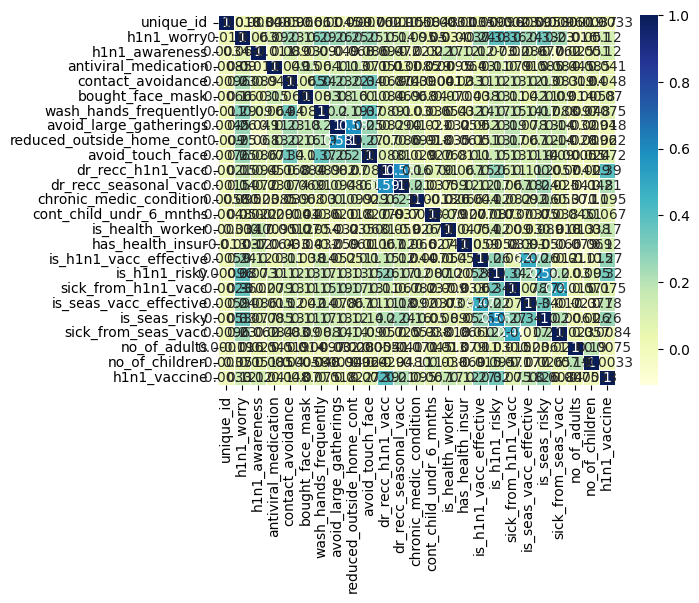

In [ ]:
correlation_mat=df.corr()
sns.heatmap(correlation_mat,annot=True,linewidth=.5,cmap="YlGnBu")

There is a positive relation between avoid_large_gatherings and reduce_outside_home_count,h1n1_worry and is_h1n1_risky , avoid_touch_face and wash_hands_frequently, avoid_touch_face and contact_avoidance.
Others are also there but these are more positive relation than those relations.


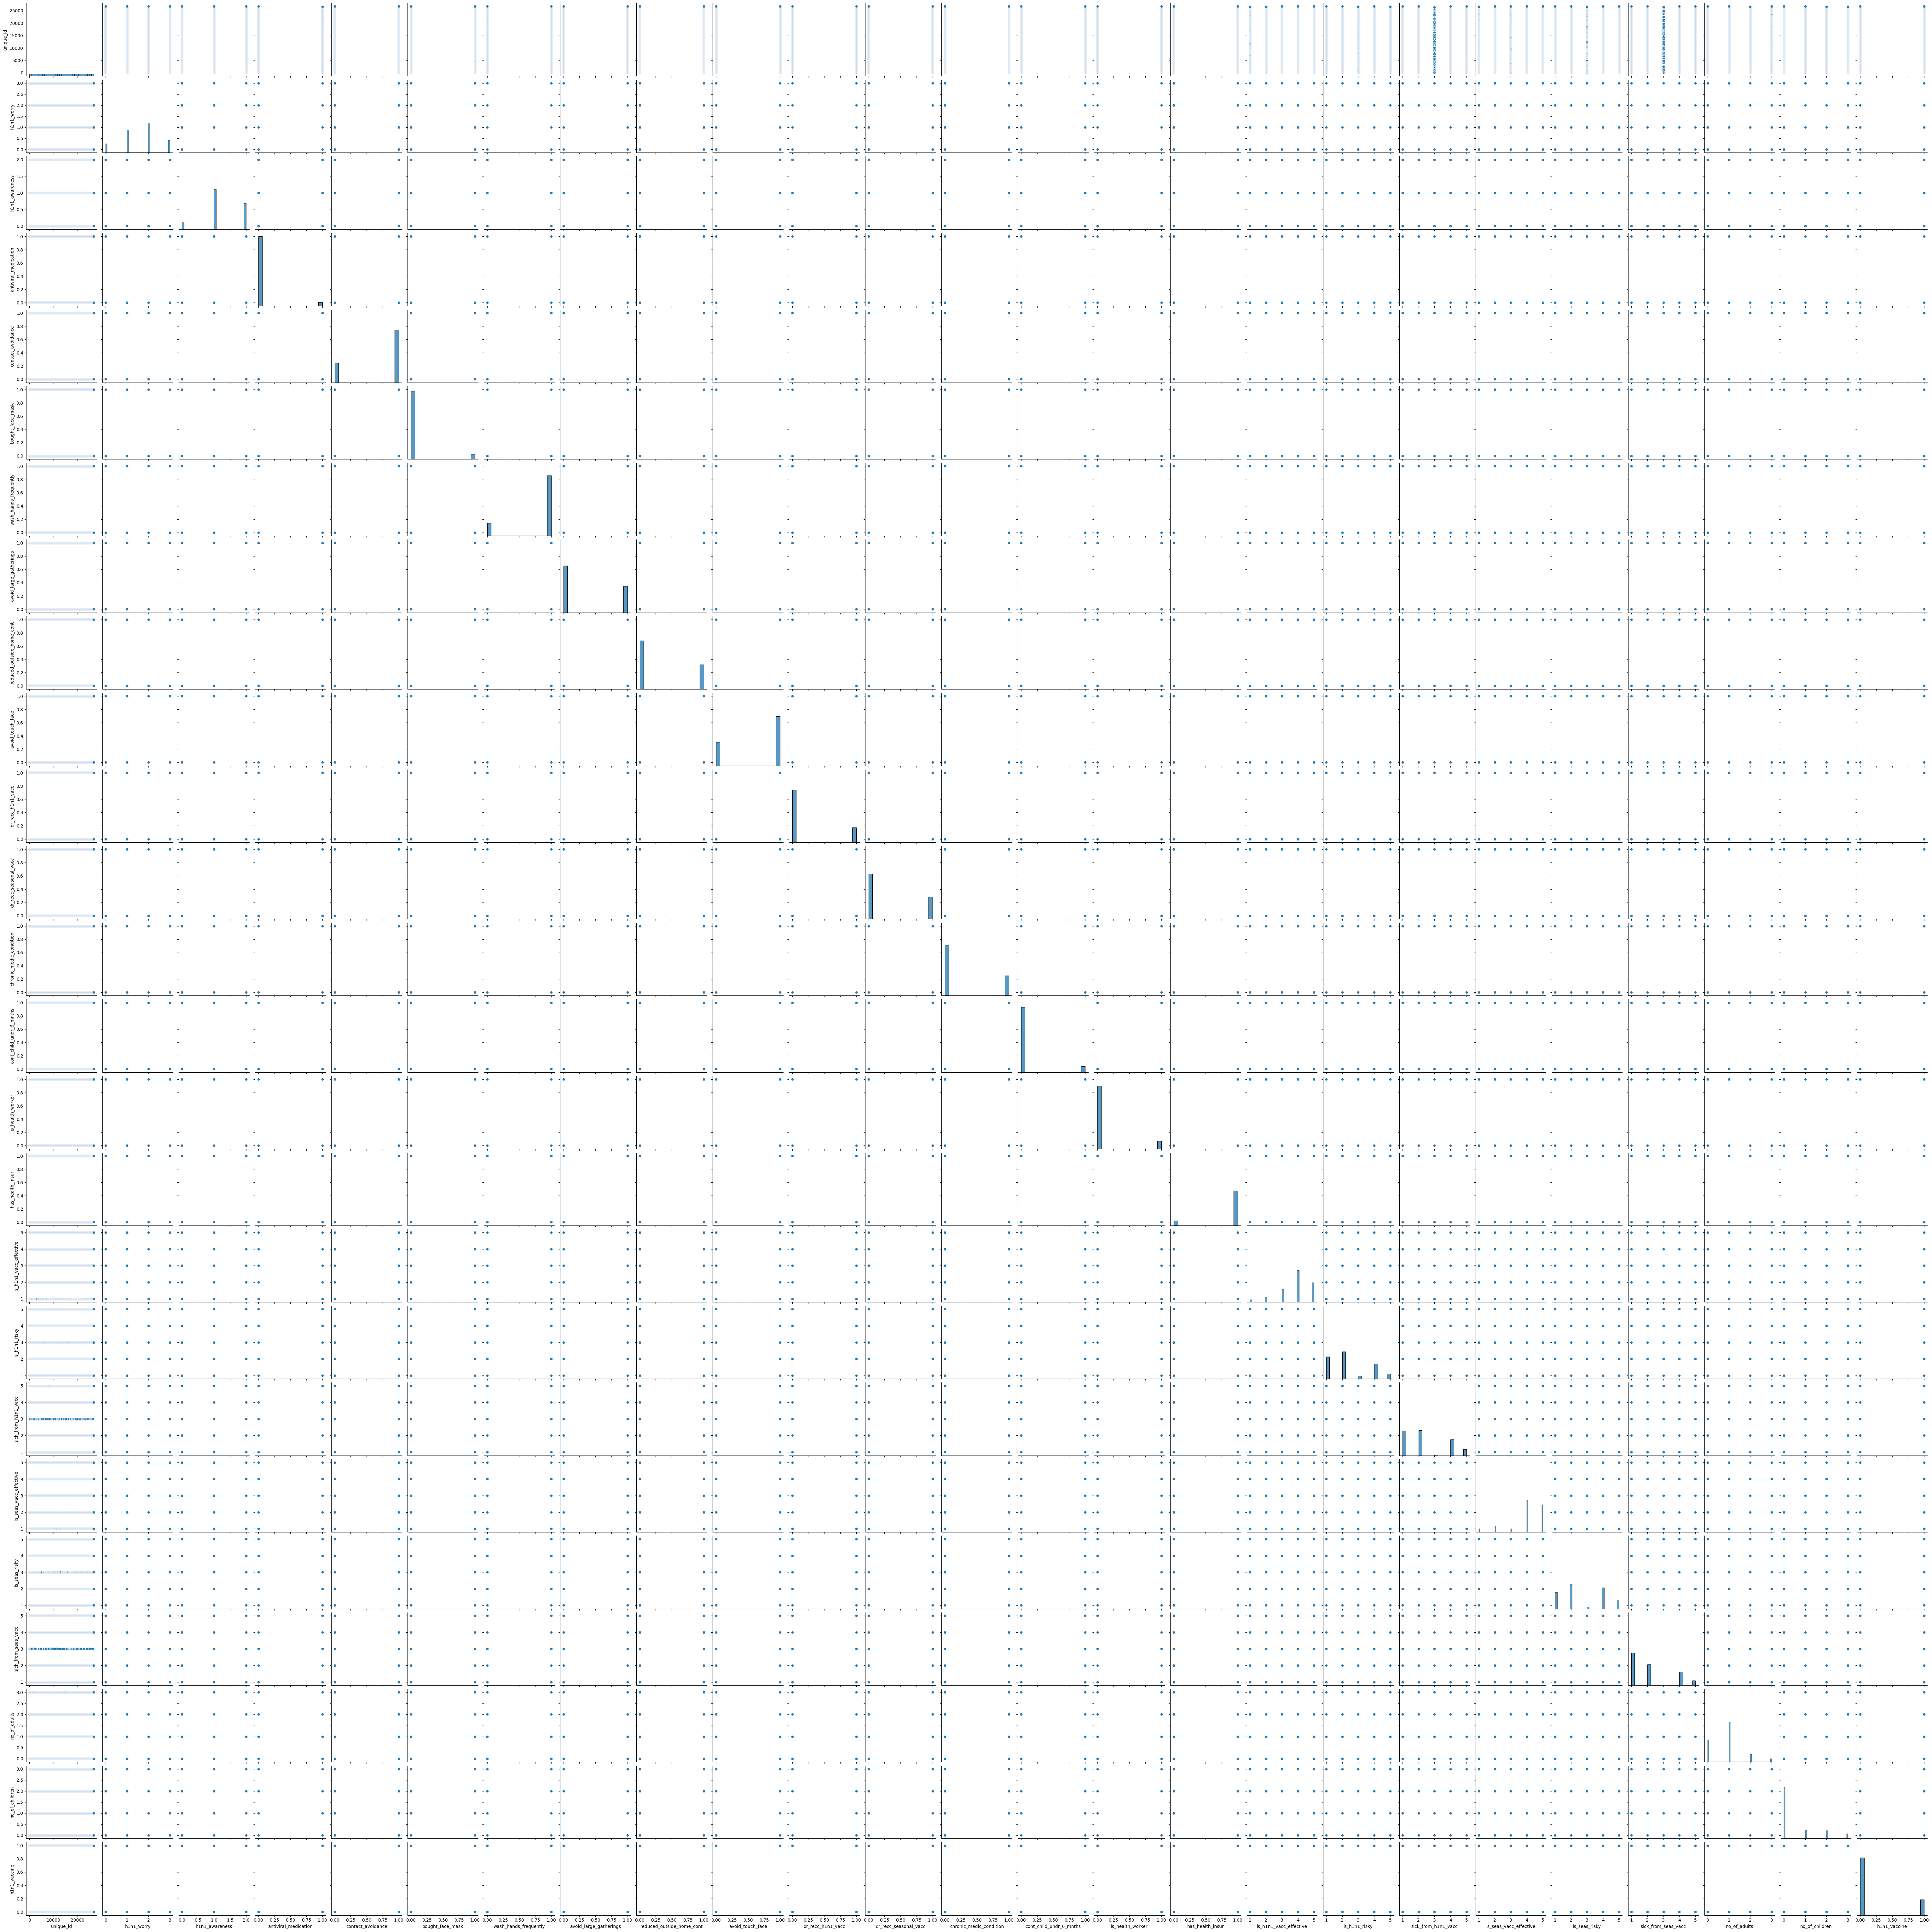

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


<Axes: >

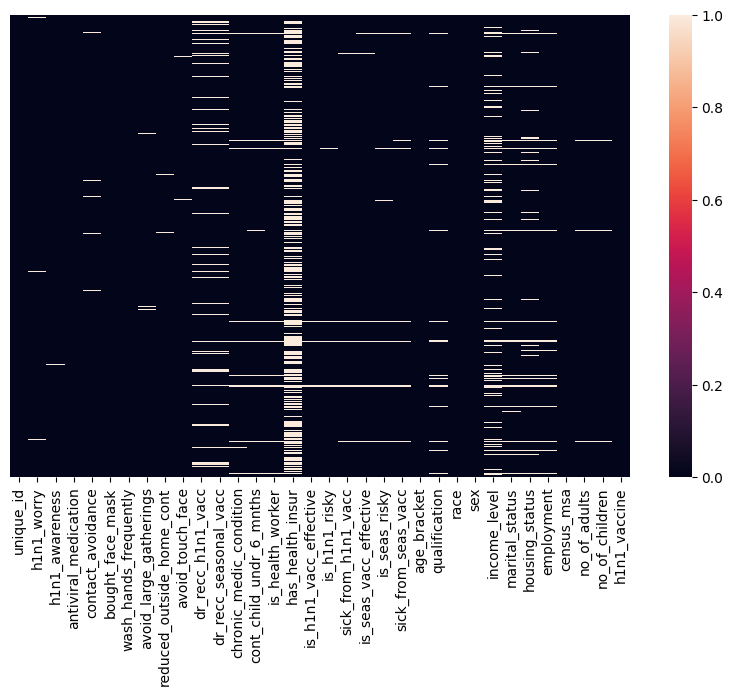

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
df.isnull().sum()


unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [ ]:
df["h1n1_worry"].fillna(df["h1n1_worry"].mode()[0],inplace=True)
df["h1n1_awareness"].fillna(df["h1n1_awareness"].mode()[0],inplace=True)
df["antiviral_medication"].fillna(df["antiviral_medication"].mode()[0],inplace=True)
df["contact_avoidance"].fillna(df["contact_avoidance"].mode()[0],inplace=True)
df["bought_face_mask"].fillna(df["bought_face_mask"].mode()[0],inplace=True)
df["wash_hands_frequently"].fillna(df["wash_hands_frequently"].mode()[0],inplace=True)
df["avoid_large_gatherings"].fillna(df["avoid_large_gatherings"].mode()[0],inplace=True)
df["reduced_outside_home_cont"].fillna(df["reduced_outside_home_cont"].mode()[0],inplace=True)
df["avoid_touch_face"].fillna(df["avoid_touch_face"].mode()[0],inplace=True)
df["dr_recc_h1n1_vacc"].fillna(df["dr_recc_h1n1_vacc"].mode()[0],inplace=True)
df["dr_recc_seasonal_vacc"].fillna(df["dr_recc_seasonal_vacc"].mode()[0],inplace=True)
df["chronic_medic_condition"].fillna(df["chronic_medic_condition"].mode()[0],inplace=True)
df["cont_child_undr_6_mnths"].fillna(df["cont_child_undr_6_mnths"].mode()[0],inplace=True)
df["is_health_worker"].fillna(df["is_health_worker"].mode()[0],inplace=True)
df["has_health_insur"].fillna(df["has_health_insur"].mode()[0],inplace=True)
df["is_h1n1_vacc_effective"].fillna(df["is_h1n1_vacc_effective"].mode()[0],inplace=True)
df["is_h1n1_risky"].fillna(df["is_h1n1_risky"].mode()[0],inplace=True)
df["sick_from_h1n1_vacc"].fillna(df["sick_from_h1n1_vacc"].mode()[0],inplace=True)
df["is_seas_vacc_effective"].fillna(df["is_seas_vacc_effective"].mode()[0],inplace=True)
df["is_seas_risky"].fillna(df["is_seas_risky"].mode()[0],inplace=True)
df["sick_from_seas_vacc"].fillna(df["sick_from_seas_vacc"].mode()[0],inplace=True)


## filling all nan values with mode of respective variable

In [ ]:
print(df["sex"].value_counts())
print(df["census_msa"].value_counts())
print(df["race"].value_counts())
print(df["marital_status"].value_counts())
print(df["no_of_adults"].value_counts())
print(df["no_of_children"].value_counts())
print(df["housing_status"].value_counts())
print(df["income_level"].value_counts())
print(df["employment"].value_counts())
print(df["qualification"].value_counts())
print(df["age_bracket"].value_counts())
print(df["is_h1n1_risky"].value_counts())
print(df["sick_from_seas_vacc"].value_counts())
print(df["is_h1n1_vacc_effective"].value_counts())
print(df["h1n1_worry"].value_counts())
print(df["h1n1_awareness"].value_counts())
print(df["contact_avoidance"].value_counts())
print(df["bought_face_mask"].value_counts())
print(df["wash_hands_frequently"].value_counts())
print(df["avoid_large_gatherings"].value_counts())
print(df["reduced_outside_home_cont"].value_counts())
print(df["dr_recc_seasonal_vacc"].value_counts())
print(df["dr_recc_h1n1_vacc"].value_counts())
print(df["avoid_touch_face"].value_counts())
print(df["chronic_medic_condition"].value_counts())
print(df["cont_child_undr_6_mnths"].value_counts())
print(df["is_health_worker"].value_counts())
print(df["has_health_insur"].value_counts())
print(df["sick_from_h1n1_vacc"].value_counts())
print(df["is_seas_vacc_effective"].value_counts())
print(df["is_seas_risky"].value_counts())

Female    15858
Male      10849
Name: sex, dtype: int64
MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64
Married        13555
Not Married    11744
Name: marital_status, dtype: int64
1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: no_of_adults, dtype: int64
0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: no_of_children, dtype: int64
Own     18736
Rent     5929
Name: housing_status, dtype: int64
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_level, dtype: int64
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment, dtype: int64
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qua

In [ ]:
## converting string data into int
df["age_bracket"]=df["age_bracket"].replace('18 - 34 Years',int(1))
df["age_bracket"]=df["age_bracket"].replace('35 - 44 Years',int(2))
df["age_bracket"]=df["age_bracket"].replace('45 - 54 Years',int(3))
df["age_bracket"]=df["age_bracket"].replace('55 - 64 Years',int(4))
df["age_bracket"]=df["age_bracket"].replace('65+ Years',int(5))

df["qualification"]=df["qualification"].replace('< 12 Years',int(0))
df["qualification"]=df["qualification"].replace('12 Years',int(1))
df["qualification"]=df["qualification"].replace('Some College',int(2))
df["qualification"]=df["qualification"].replace('College Graduate',int(3))

df["race"]=df["race"].replace('Other or Multiple',int(0))
df["race"]=df["race"].replace('Hispanic',int(1))
df["race"]=df["race"].replace('Black',int(2))
df["race"]=df["race"].replace('White',int(3))

df["sex"]=df["sex"].replace('Female',int(1))
df["sex"]=df["sex"].replace('Male',int(0))

df["income_level"]=df["income_level"].replace('Below Poverty',int(0))
df["income_level"]=df["income_level"].replace('<= $75,000, Above Poverty',int(1))
df["income_level"]=df["income_level"].replace('> $75,000',int(2))

df["marital_status"]=df["marital_status"].replace('Married',int(1))
df["marital_status"]=df["marital_status"].replace('Not Married',int(0))
df["housing_status"]=df["housing_status"].replace('Rent',int(0))
df["housing_status"]=df["housing_status"].replace('Own',int(1))

df["employment"]=df["employment"].replace('Employed',int(1))
df["employment"]=df["employment"].replace('Not in Labor Force',int(2))
df["employment"]=df["employment"].replace('Unemployed',int(0))

df["census_msa"]=df["census_msa"].replace('MSA, Not Principle  City',int(2))
df["census_msa"]=df["census_msa"].replace('MSA, Principle City',int(1))
df["census_msa"]=df["census_msa"].replace('Non-MSA',int(0))


In [ ]:
## filling all nan values of the above data converted columns with mode of respective variable

df["qualification"].fillna(df["qualification"].mode()[0],inplace=True)
df["income_level"].fillna(df["income_level"].mode()[0],inplace=True)
df["marital_status"].fillna(df["marital_status"].mode()[0],inplace=True)
df["housing_status"].fillna(df["housing_status"].mode()[0],inplace=True)
df["employment"].fillna(df["employment"].mode()[0],inplace=True)
df["no_of_adults"].fillna(df["no_of_adults"].mode()[0],inplace=True)
df["no_of_children"].fillna(df["no_of_children"].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

<Axes: >

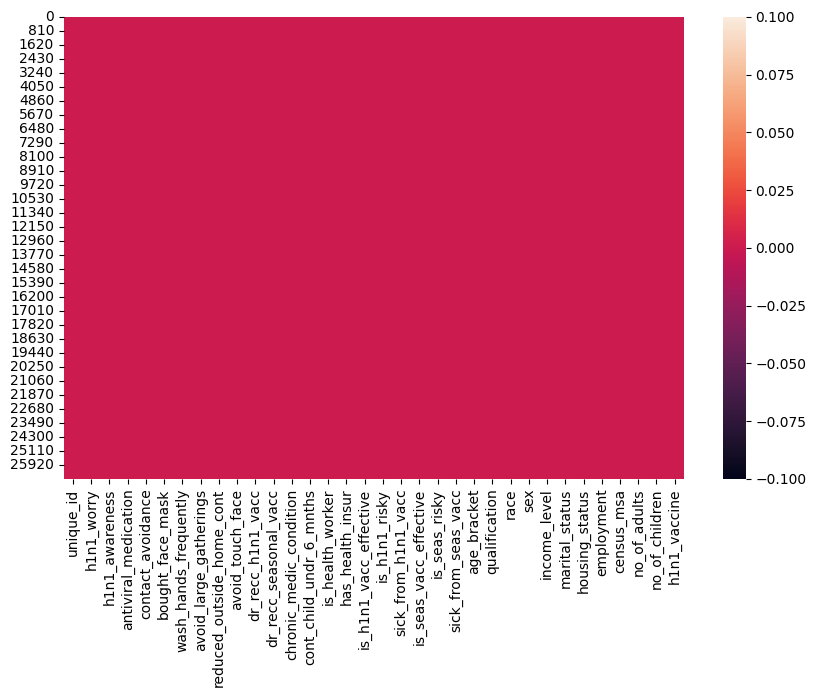

In [ ]:
##heat map for null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [ ]:
df.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,1,0.0,0.0,1.0,2.0,0,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,0,0.0,0.0,0.0,1.0,2,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,0,1.0,0.0,1.0,1.0,2,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,1,0.0,0.0,0.0,2.0,1,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,1,1.0,1.0,1.0,1.0,2,1.0,0.0,0


In [ ]:
df["sex"]= le.fit_transform(df["sex"])
df["marital_status"]= le.fit_transform(df["marital_status"])
df["housing_status"]= le.fit_transform(df["housing_status"])
df["race"]= le.fit_transform(df["race"])
df["employment"]= le.fit_transform(df["employment"])
df["income_level"]= le.fit_transform(df["income_level"])
df["avoid_touch_face"]= le.fit_transform(df["avoid_touch_face"])
df["no_of_children"]= le.fit_transform(df["no_of_children"])
df["no_of_adults"]= le.fit_transform(df["no_of_adults"])
df["wash_hands_frequently"]= le.fit_transform(df["wash_hands_frequently"])
df["avoid_large_gatherings"]= le.fit_transform(df["avoid_large_gatherings"])
df["reduced_outside_home_cont"]= le.fit_transform(df["reduced_outside_home_cont"])
df["h1n1_worry"]= le.fit_transform(df["h1n1_worry"])
df["h1n1_awareness"]= le.fit_transform(df["h1n1_awareness"])
df["antiviral_medication"]= le.fit_transform(df["antiviral_medication"])
df["contact_avoidance"]= le.fit_transform(df["contact_avoidance"])
df["bought_face_mask"]= le.fit_transform(df["bought_face_mask"])
df["dr_recc_h1n1_vacc"]= le.fit_transform(df["dr_recc_h1n1_vacc"])
df["dr_recc_seasonal_vacc"]= le.fit_transform(df["dr_recc_seasonal_vacc"])
df["chronic_medic_condition"]= le.fit_transform(df["chronic_medic_condition"])
df["cont_child_undr_6_mnths"]= le.fit_transform(df["cont_child_undr_6_mnths"])
df["is_health_worker"]= le.fit_transform(df["is_health_worker"])
df["has_health_insur"]= le.fit_transform(df["has_health_insur"])
df["is_h1n1_vacc_effective"]= le.fit_transform(df["is_h1n1_vacc_effective"])
df["is_h1n1_risky"]= le.fit_transform(df["is_h1n1_risky"])
df["sick_from_h1n1_vacc"]= le.fit_transform(df["sick_from_h1n1_vacc"])
df["is_seas_risky"]= le.fit_transform(df["is_seas_risky"])
df["sick_from_seas_vacc"]= le.fit_transform(df["sick_from_seas_vacc"])
df["age_bracket"]= le.fit_transform(df["age_bracket"])
df.head(5)



,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1,0,0,0,0,0,0,1,1,...,3,1,0,0,1,2,0,0,0,0
1,1,3,2,0,1,0,1,0,1,1,...,3,0,0,0,0,1,2,0,0,0
2,2,1,1,0,1,0,0,0,0,0,...,3,0,1,0,1,1,2,2,0,0
3,3,1,1,0,1,0,1,1,0,0,...,3,1,0,0,0,2,1,0,0,0
4,4,2,1,0,1,0,1,1,0,1,...,3,1,1,1,1,1,2,1,0,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

In [ ]:
model1=LogisticRegression(solver="liblinear")

In [ ]:
model1.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
dtree=DecisionTreeClassifier(criterion='gini',max_depth=1)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [ ]:
model1.score(x_train,y_train)

0.8393035446829755

In [ ]:

model1.score(x_test,y_test)

0.8298230834035384

In [ ]:
dtree=DecisionTreeClassifier(criterion = 'gini',max_depth = 3,random_state=0)
dtree.fit(x_train,y_train)
print(dtree.score(x_train,y_train))

0.8299425861208187


In [ ]:
y_predict=dtree.predict(x_test)
print(dtree.score(x_test,y_test))

0.8225217635495647


In [ ]:
model2=AdaBoostClassifier()
model2.fit(x_train,y_train)
model2.score(x_train,y_train)


0.8376809785322017

In [ ]:
model2.score(x_test,y_test)

0.8290742300851821

In [ ]:
model3=GradientBoostingClassifier()
model3.fit(x_train,y_train)
model3.score(x_train,y_train)


0.8470419370943585

In [ ]:
model3.score(x_test,y_test)

0.8334737433305252

In [ ]:
model4=RandomForestClassifier(max_depth=10)
model4.fit(x_train,y_train)
model4.score(x_train,y_train)


0.8806165751372941

In [ ]:
model4.score(x_test,y_test)

0.8305719367218946

BY using random forest classifier we are getting  5% change in train and test data


In [ ]:
from sklearn import metrics

<Axes: >

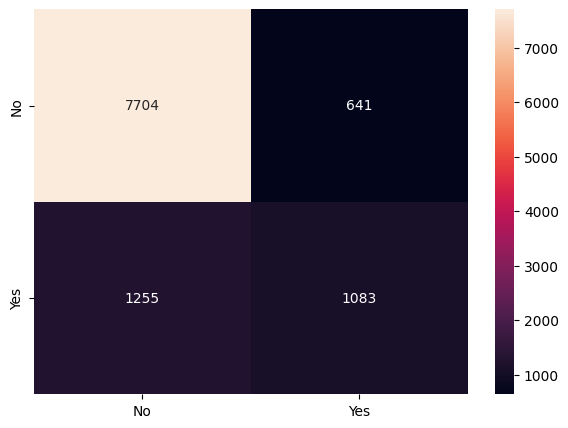

In [ ]:
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])

df_cm=pd.DataFrame(cm,index=[i for i in ["No","Yes"]],
            columns=[i for i in ["No","Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')